# Neural Network

Data:
$f(x) = (x^3) +(3x^2)-2$<br>



The Alrorightm itself consists of three components:
1.  Hypothesis: $h_w(x) = U_kz_k + c_k$
2.  Loss: $\frac{1}{N}\sum_{i=1}^n(y_i-\hat{y}_i)^2$ 

3.  Optimization: <br>
$ \substack{minimize\\w} J(w) = \frac{1}{m}\sum_{i=1}^m l[h_w(x_i),y_i)]$<br>
$w \leftarrow -\alpha\Delta J(w)$


Objective Function:
$h(x) = w^T\phi(x) + b$<br>


Feature Function:
$\phi(x) = \sigma(Ux+b)$<br>


Neural Network:
$h_w(x) = U_2\sigma(U_1x+b_1)+b_2$


Objective Function:
$J(w) = \frac{1}{m}\sum_{i=1}^m l[h_w(x_i),y_i)]$
   


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Data 

In [2]:
def generate_training_points(n):
    training_points = []
    f = lambda x: (x**3)+(3*x**2)-(2)
    
    for s in np.linspace(-3,2,n):
        training_points.append([s,f(s)])
        
    return np.array(training_points)
    

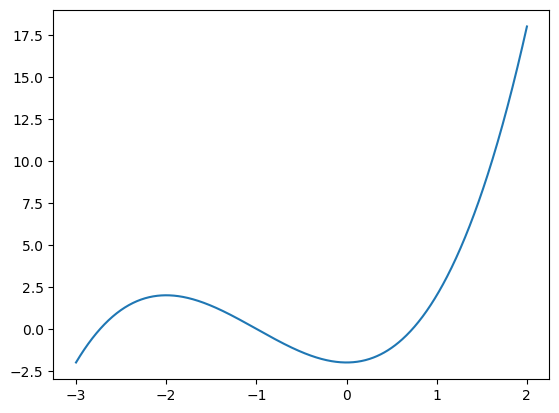

In [3]:
data = generate_training_points(1000)

X = data[:,0]
Y_hat = data[:,1]
N = len(data)


plt.plot(data[:,0],data[:,1])

## Network

In [4]:
U_1 = np.random.normal(size=(1000,1))
b_1 = np.zeros((1000,1))

U_2 = np.random.normal(size=(1,1000))
b_2 = np.zeros((1,1))



In [5]:
def sigmoid(x):
    return np.exp(x) / (np.exp(x) +1)

def derivative_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def SE(y, y_hat):
    return np.square(y-y_hat)
    

In [6]:
def feed_forward(x,U_1,b_1,U_2,b_2):
    z1 = U_1.dot(x)+b_1
    a1 = sigmoid(z1)
    
    z2 = U_2.dot(a1)+b_2
    # No activation function since we use it for regression.
    return z2

def backprop(x,U_1,b_1,U_2,b_2,y_hat,alpha):
    
    z1 = U_1.dot(x)+b_1
    a1 = sigmoid(z1)
    
    z2 = U_2.dot(a1)+b_2
    # No activation function since we use it for regression.
    
 ############### BACKPROP ################

    dl_dyhat = 2*(z2-y_hat)
    
    dl_dd = dl_dyhat
    dl_db2 = dl_dyhat
    
    dl_dphi = U_2*dl_dd
    dl_dU2 = a1*dl_dd
    
    dl_dp = derivative_sigmoid(x)*dl_dphi.T
    
    dl_dm = dl_dp
    dl_db1 = dl_dp
    
    dl_dU1 = dl_dm*x

    
    U_1 -= alpha*dl_dU1
    b_1 -= alpha*dl_db1
    U_2 -= alpha*dl_dU2.T
    b_2 -= alpha*dl_db2
    

    
    return (U_1,b_1,U_2,b_2)

In [7]:
def train(U_1,b_1,U_2,b_2,X,Y_hat,N,epochs = 5000, alpha = 1e-4):
    loss = []
    acc = []
    for e in range(epochs):
        l = []
        for i in range(len(X)):
            y = feed_forward(X[i],U_1,b_1,U_2,b_2)
            l.append(SE(y,Y_hat[i]))
            U_1,b_1,U_2,b_2 = backprop(X[i],U_1,b_1,U_2,b_2,Y_hat[i],alpha)
            
        acc.append((1-(sum(l)/len(X)))*100)
        loss.append(sum(l)/len(X))   
        #print(f"Epoch: {e+1}, loss = {sum(l)/len(X)}")
    return (U_1, b_1, U_2, b_2,acc[-1],loss[-1])

In [ ]:
r = train(U_1,b_1,U_2,b_2,X,Y_hat,N)

In [ ]:
pred = []
for x in X:
    pred.append(feed_forward(x,r[0],r[1],r[2],r[3]).reshape(1))
print(f"Loss (MSE): {r[-1]}")

In [ ]:
plt.plot(X,pred,X,Y_hat)
plt.legend(["Prediction","Ground Truth"])